# Analyzing the growth in wind power capacity worldwide from 2013 to 2022

### Using web-scrapping to get the statistical information

I will get the information from [The WindPower page](https://www.thewindpower.net/statistics_countries_es.php), specifically retrieving the next table with all the columns and rows.

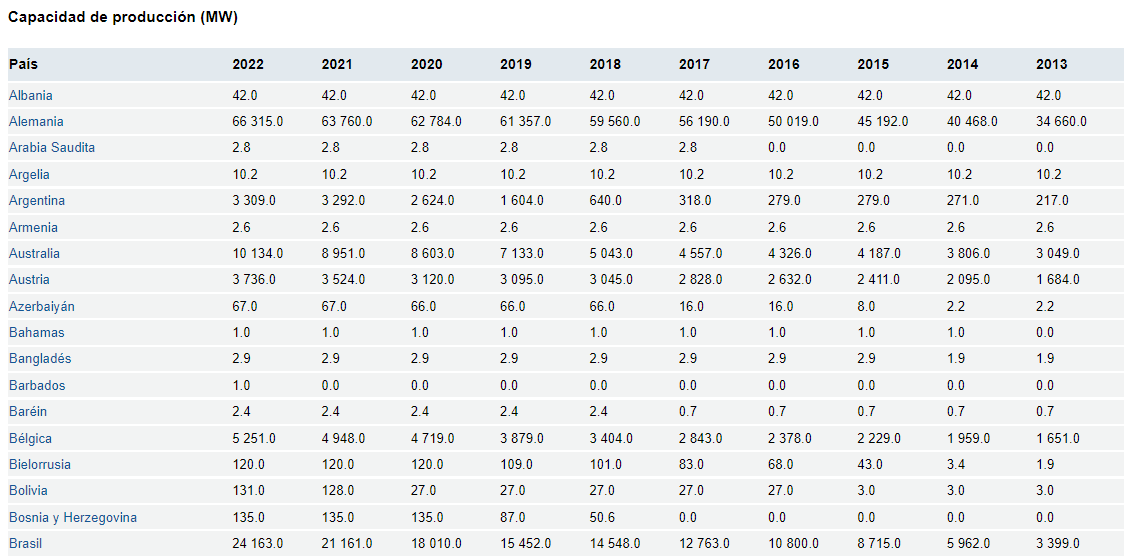

To do so and the extra cleaning and analysis, I am going to use the next python's libraries:
 1. requests 
 2. bs4 (BeautifulSoup)
 3. pandas
 4. numpy
 5. Matplotlib
 6. Seaborn
 7. deep_translator (GoogleTranslator)

We start importing those libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from deep_translator import GoogleTranslator


The next step is copy the url from the webpage I'll retrieve the table: <https://www.thewindpower.net/statistics_countries_es.php> and make a request to retrieve the HTML code from the page.

In [2]:
url="https://www.thewindpower.net/statistics_countries_es.php"
r=requests.get(url)
if r.status_code == 200:
    print("The HMTL code from the url was succesfully retrieved")
else:
    print(f"Error. status code: {r.status_code}")

The HMTL code from the url was succesfully retrieved


Then, we can read the html code through the **BeautifulSoup object**, and search for the table I need.
The table in HTML has the tag "table", so I am going to search for it using the function **find_all()**, which retrieves a sort of list with all the tables in the HTML code (each entry of this list is a table).

Now we have the HTML code for each table, we need to convert the code in a table that python can read. So I am going to use the **pandas** function **read_html()**. This function returns a list of DataFrames (tables).

To find the table I need, I can parse through the tables and look for the one which has "País" and "2022" in the position (0,0) and (0,1), respectively.

In [3]:
soup=BeautifulSoup(r.text,"html5lib")
tables=pd.read_html(str(soup.find_all("table")))
for pos,table in enumerate(tables): 
    if (table.iloc[0,0]=="País") & ("2022" in str(table.iloc[0,1])):
        print(f"Found table, position in list: {pos}")
    

Found table, position in list: 4


Now I know the table I'm looking for is in the position 4 of the list of tables. I'm going to show how this table was retrieved

In [4]:
table=tables[4]
table.head(7)

0                  1                  2                  3   \
0            País          2022 2022          2021 2021          2020 2020   
1             NaN                NaN                NaN                NaN   
2         Albania          42.0 42.0          42.0 42.0          42.0 42.0   
3             NaN                NaN                NaN                NaN   
4        Alemania  66 315.0 66 315.0  63 760.0 63 760.0  62 784.0 62 784.0   
5             NaN                NaN                NaN                NaN   
6  Arabia Saudita            2.8 2.8            2.8 2.8            2.8 2.8   

                  4                  5                  6                  7   \
0          2019 2019          2018 2018          2017 2017          2016 2016   
1                NaN                NaN                NaN                NaN   
2          42.0 42.0          42.0 42.0          42.0 42.0          42.0 42.0   
3                NaN                NaN                NaN                NaN   
4  61 357.0 61 357.0  59 560.0 59 560.0  56 190.0 56 190.0  50 019.0 50 019.0   
5                NaN                NaN                NaN                NaN   
6            2.8 2.8            2.8 2.8            2.8 2.8            0.0 0.0   

                  8                  9                  10  
0          2015 2015          2014 2014          2013 2013  
1                NaN                NaN                NaN  
2          42.0 42.0          42.0 42.0          42.0 42.0  
3                NaN                NaN                NaN  
4  45 192.0 45 192.0  40 468.0 40 468.0  34 660.0 34 660.0  
5                NaN                NaN                NaN  
6            0.0 0.0            0.0 0.0            0.0 0.0

As you can see, the table needs to be cleaned. so in the next section I am going to do it.

### Cleaning the retrieved table

First, I will erase all the empty rows

In [5]:
table.dropna(inplace=True)
table.head(7)

0                  1                  2                  3   \
0             País          2022 2022          2021 2021          2020 2020   
2          Albania          42.0 42.0          42.0 42.0          42.0 42.0   
4         Alemania  66 315.0 66 315.0  63 760.0 63 760.0  62 784.0 62 784.0   
6   Arabia Saudita            2.8 2.8            2.8 2.8            2.8 2.8   
8          Argelia          10.2 10.2          10.2 10.2          10.2 10.2   
10       Argentina    3 309.0 3 309.0    3 292.0 3 292.0    2 624.0 2 624.0   
12         Armenia            2.6 2.6            2.6 2.6            2.6 2.6   

                   4                  5                  6   \
0           2019 2019          2018 2018          2017 2017   
2           42.0 42.0          42.0 42.0          42.0 42.0   
4   61 357.0 61 357.0  59 560.0 59 560.0  56 190.0 56 190.0   
6             2.8 2.8            2.8 2.8            2.8 2.8   
8           10.2 10.2          10.2 10.2          10.2 10.2   
10    1 604.0 1 604.0        640.0 640.0        318.0 318.0   
12            2.6 2.6            2.6 2.6            2.6 2.6   

                   7                  8                  9                  10  
0           2016 2016          2015 2015          2014 2014          2013 2013  
2           42.0 42.0          42.0 42.0          42.0 42.0          42.0 42.0  
4   50 019.0 50 019.0  45 192.0 45 192.0  40 468.0 40 468.0  34 660.0 34 660.0  
6             0.0 0.0            0.0 0.0            0.0 0.0            0.0 0.0  
8           10.2 10.2          10.2 10.2          10.2 10.2          10.2 10.2  
10        279.0 279.0        279.0 279.0        271.0 271.0        217.0 217.0  
12            2.6 2.6            2.6 2.6            2.6 2.6            2.6 2.6

Then, I will change the column names with their respective year, and I will erase the duplicate values.

In [6]:
new_col_names=[] #list with the new names of the columns
col_names=table.iloc[0,:] #get all the first row
for name in col_names:
    new_name=name.strip().split()[0]
    new_col_names.append(new_name)
new_col_names

['País',
 '2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013']

Now I have cleaned the columns names, I am going to set them into the table and erase the first row (because it has the column names)

In [7]:
table.columns=new_col_names
if table.iloc[0,0]=="País":
    table.drop(0,inplace=True)
table.reset_index(drop=True,inplace=True)
table.tail(7)

País                 2022                 2021  \
126     Uruguay      1 514.0 1 514.0      1 514.0 1 514.0   
127  Uzbekistán              0.8 0.8              0.8 0.8   
128     Vanuatu              3.9 3.9              3.9 3.9   
129   Venezuela            71.0 71.0            71.0 71.0   
130     Vietnam      4 628.0 4 628.0      4 118.0 4 118.0   
131      Yibuti            20.0 20.0            20.0 20.0   
132       Total  899 155.7 899 155.7  824 622.6 824 622.6   

                    2020                 2019                 2018  \
126      1 514.0 1 514.0      1 514.0 1 514.0      1 511.0 1 511.0   
127              0.8 0.8              0.8 0.8              0.8 0.8   
128              3.9 3.9              3.9 3.9              3.9 3.9   
129            71.0 71.0            71.0 71.0            71.0 71.0   
130          600.0 600.0          388.0 388.0          232.0 232.0   
131              0.0 0.0              0.0 0.0              0.0 0.0   
132  738 994.0 738 994.0  652 938.6 652 938.6  590 867.0 590 867.0   

                    2017                 2016                 2015  \
126      1 505.0 1 505.0      1 210.0 1 210.0          845.0 845.0   
127              0.8 0.8              0.8 0.8              0.8 0.8   
128              3.9 3.9              3.9 3.9              3.9 3.9   
129            71.0 71.0            71.0 71.0            71.0 71.0   
130          193.0 193.0          151.0 151.0          135.0 135.0   
131              0.0 0.0              0.0 0.0              0.0 0.0   
132  539 382.5 539 382.5  487 302.5 487 302.5  435 550.9 435 550.9   

                    2014                 2013  
126          529.0 529.0            59.0 59.0  
127              0.8 0.8              0.8 0.8  
128              3.9 3.9              3.3 3.3  
129            71.0 71.0            71.0 71.0  
130            31.0 31.0            31.0 31.0  
131              0.0 0.0              0.0 0.0  
132  371 184.9 371 184.9  318 825.8 318 825.8

In [8]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   País    133 non-null    object
 1   2022    133 non-null    object
 2   2021    133 non-null    object
 3   2020    133 non-null    object
 4   2019    133 non-null    object
 5   2018    133 non-null    object
 6   2017    133 non-null    object
 7   2016    133 non-null    object
 8   2015    133 non-null    object
 9   2014    133 non-null    object
 10  2013    133 non-null    object
dtypes: object(11)
memory usage: 11.6+ KB


As you can see, each row has duplicated values in each entry. Knowing that python recognized the data type of the values as object type (string type), I will split each value by blank spaces. Then, I will convert the object type into a float type.

In [9]:

for col in table.columns: # go column by column
    new_col_vals=[]
    if col != "País": 
        col_values=table[col] # get all the rows of the "col" column 
        for value in col_values: # go row by row
            value_list=value.split() # separate the values by blank spaces
            if len(value_list)==2:
                new_col_vals.append(float(value_list[0]))
            else:
                new_col_vals.append(float(value_list[0]+value_list[1]))
        table.loc[:,col]=new_col_vals     
        

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_25816\533563955.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  table.loc[:,col]=new_col_vals


In [10]:
table.tail(7) 

País      2022      2021      2020      2019      2018      2017  \
126     Uruguay    1514.0    1514.0    1514.0    1514.0    1511.0    1505.0   
127  Uzbekistán       0.8       0.8       0.8       0.8       0.8       0.8   
128     Vanuatu       3.9       3.9       3.9       3.9       3.9       3.9   
129   Venezuela      71.0      71.0      71.0      71.0      71.0      71.0   
130     Vietnam    4628.0    4118.0     600.0     388.0     232.0     193.0   
131      Yibuti      20.0      20.0       0.0       0.0       0.0       0.0   
132       Total  899155.7  824622.6  738994.0  652938.6  590867.0  539382.5   

         2016      2015      2014      2013  
126    1210.0     845.0     529.0      59.0  
127       0.8       0.8       0.8       0.8  
128       3.9       3.9       3.9       3.3  
129      71.0      71.0      71.0      71.0  
130     151.0     135.0      31.0      31.0  
131       0.0       0.0       0.0       0.0  
132  487302.5  435550.9  371184.9  318825.8

As all the notebook is in english, I will translate the country's name to this language.

In [11]:
translator=GoogleTranslator(source="es",target="en")
new_col_names=translator.translate_batch(table.País.tolist()) #translate to english the names of the countries 

In [12]:
table.País=new_col_names
table.rename(columns={"País":"Country"},inplace=True)
table.loc[:,"Country"].tolist()

['Albanian',
 'Germany',
 'Saudi Arabia',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'barbados',
 'bahrain',
 'Belgium',
 'belarus',
 'bolivian',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'bhutan',
 'Cape Verde',
 'Cambodia',
 'Canada',
 'Chad',
 'Chili',
 'China',
 'Cyprus',
 'Colombia',
 'South Korea',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'curacao',
 'Denmark',
 'Dominica',
 'Ecuador',
 'Egypt',
 'The Savior',
 'United Arab Emirates',
 'eritrea',
 'Slovakia',
 'Slovenia',
 'Spain',
 'USA',
 'Estonia',
 'Ethiopia',
 'Philippines',
 'Finland',
 'fiji',
 'France',
 'Gambia',
 'Georgia',
 'Ghana',
 'Grenade',
 'Greece',
 'Guam',
 'Guatemala',
 'guyana',
 'Honduras',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Iceland',
 'Faroe Islands',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Latvia',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'North Macedon

In [13]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  133 non-null    object 
 1   2022     133 non-null    float64
 2   2021     133 non-null    float64
 3   2020     133 non-null    float64
 4   2019     133 non-null    float64
 5   2018     133 non-null    float64
 6   2017     133 non-null    float64
 7   2016     133 non-null    float64
 8   2015     133 non-null    float64
 9   2014     133 non-null    float64
 10  2013     133 non-null    float64
dtypes: float64(10), object(1)
memory usage: 11.6+ KB


As you can see, the value types of each column now are a float64 type, instead of an object type, and the values are now unique for each entry.

It may be worthy if we transpose the table, so it can be easier to analyze and visualize the data in a future analysis.

In [14]:
table_t=table.transpose()
table_t.head()

0        1             2        3          4        5    \
Country  Albanian  Germany  Saudi Arabia  Algeria  Argentina  Armenia   
2022         42.0  66315.0           2.8     10.2     3309.0      2.6   
2021         42.0  63760.0           2.8     10.2     3292.0      2.6   
2020         42.0  62784.0           2.8     10.2     2624.0      2.6   
2019         42.0  61357.0           2.8     10.2     1604.0      2.6   

               6        7           8        9    ...      123      124  \
Country  Australia  Austria  Azerbaijan  Bahamas  ...  Türkiye  Ukraine   
2022       10134.0   3736.0        67.0      1.0  ...  11396.0   1761.0   
2021        8951.0   3524.0        67.0      1.0  ...  10607.0   1761.0   
2020        8603.0   3120.0        66.0      1.0  ...   9305.0   1314.0   
2019        7133.0   3095.0        66.0      1.0  ...   8056.0   1170.0   

            125      126         127      128        129      130       131  \
Country  Uganda  Uruguay  uzbekistan  Vanuatu  Venezuela  Vietnam  djibouti   
2022        0.0   1514.0         0.8      3.9       71.0   4628.0      20.0   
2021        0.0   1514.0         0.8      3.9       71.0   4118.0      20.0   
2020        0.0   1514.0         0.8      3.9       71.0    600.0       0.0   
2019        0.0   1514.0         0.8      3.9       71.0    388.0       0.0   

              132  
Country     Total  
2022     899155.7  
2021     824622.6  
2020     738994.0  
2019     652938.6  

[5 rows x 133 columns]

As in the non transposed table, we need to change the column names

In [15]:

col_names=list(table_t.iloc[0,:]) # get the names of the countries within the table
if "Country" in table_t.index.tolist():
    table_t.drop("Country",inplace=True) # erase the row with the names


In [16]:
table_t.columns=new_col_names # rename the columns
table_t.head()


Albanian  Germany Saudi Arabia Algeria Argentina Armenia Australia  \
2022     42.0  66315.0          2.8    10.2    3309.0     2.6   10134.0   
2021     42.0  63760.0          2.8    10.2    3292.0     2.6    8951.0   
2020     42.0  62784.0          2.8    10.2    2624.0     2.6    8603.0   
2019     42.0  61357.0          2.8    10.2    1604.0     2.6    7133.0   
2018     42.0  59560.0          2.8    10.2     640.0     2.6    5043.0   

     Austria Azerbaijan Bahamas  ...  Türkiye Ukraine Uganda Uruguay  \
2022  3736.0       67.0     1.0  ...  11396.0  1761.0    0.0  1514.0   
2021  3524.0       67.0     1.0  ...  10607.0  1761.0    0.0  1514.0   
2020  3120.0       66.0     1.0  ...   9305.0  1314.0    0.0  1514.0   
2019  3095.0       66.0     1.0  ...   8056.0  1170.0    0.0  1514.0   
2018  3045.0       66.0     1.0  ...   7154.0   596.0    0.0  1511.0   

     uzbekistan Vanuatu Venezuela Vietnam djibouti     Total  
2022        0.8     3.9      71.0  4628.0     20.0  899155.7  
2021        0.8     3.9      71.0  4118.0     20.0  824622.6  
2020        0.8     3.9      71.0   600.0      0.0  738994.0  
2019        0.8     3.9      71.0   388.0      0.0  652938.6  
2018        0.8     3.9      71.0   232.0      0.0  590867.0  

[5 rows x 133 columns]

In [35]:
table_t["China"]/1000

2022    365.964
2021    328.973
2020    281.993
2019    237.029
2018    211.392
2017    187.730
2016    168.730
2015    147.362
2014    114.763
2013     91.324
Name: China, dtype: float64

### Exploratory analysis

#### Top 5 countries with the highest capacity of wind power and its growth through time

In [18]:
top5=table.sort_values("2022",ascending=False).head(6).Country.tolist()
top5.remove("Total")
top5

['China', 'USA', 'Germany', 'India', 'Spain']

In [19]:
plt.rcParams["figure.dpi"] = 1000
plt.figure(figsize=(10,8))
fig=sns.lineplot(data=table_t[top5].sort_index(ascending=True)/1000,
                 markers=True)
fig.set_title("Wind power growth of the top 5 countries \nwith the highest wind power capacity \n(GW)")
fig.set_ylabel("GW")
plt.show()

#### Contribution by country to global installed wind power capacity in 2022

In [20]:
top10=table.sort_values("2022",ascending=False).Country.head(11).tolist()
top10.remove("Total")
top10.append("Others") 
top10.append("Mexico")

total_2022=table_t["Total"][0]/1000 # All the installed wind power capacity in 2022
top10dic={}
for country in table.Country:
    if country in top10:
        
        value_2022=round(table_t.loc["2022"][country]/1000,2) #get the installed power of the country in 2022
        top10dic[country]=value_2022
        
value_others=round(table.query("Country not in @top10 & Country !='Total'")["2022"].sum()/1000,2)
top10dic["Others"]=value_others
#print(top10dic)

plt.rcParams["figure.dpi"] = 1000
plt.figure(figsize=(10,8))
plt.pie(x=top10dic.values(),
        labels=top10dic.keys(),
        textprops={"fontsize":12},
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("coolwarm",len(top10dic)))
#coolwarm
plt.tight_layout()
plt.title("Contribution by country to global installed \nwind power capacity in 2022",fontsize=16)
plt.show()

### Increase in wind power capacity each year for every country

I am going to use the gradient to find the derivate at each year, this derivate will give us the change rate in power capacity.

In [21]:
grad_table={}
table_t=table_t.astype("float")
for col in table_t.columns:
    grad_table[col]=-np.gradient(np.array(table_t[col]/1000)).round(2) #negative because of the index, goes from max to min
grad=pd.DataFrame(grad_table, index=table_t.index.tolist())
top10.remove("Others")
grad[top10].head()

China    USA  Germany  India  Spain  United Kingdom  Brazil  France  \
2022  36.99   8.12     2.55   1.86   1.81            1.41    3.00    2.44   
2021  41.99   9.27     1.77   1.65   0.93            2.18    3.08    1.59   
2020  45.97  13.65     1.20   1.27   0.84            1.81    2.85    1.01   
2019  35.30  12.83     1.61   1.41   2.01            1.60    1.73    1.32   
2018  24.65   8.19     2.58   2.34   1.32            2.32    1.34    1.44   

      Canada  Sweden  Mexico  
2022    0.99    2.48    0.16  
2021    0.85    2.28    0.40  
2020    0.45    1.55    0.47  
2019    0.37    1.43    0.97  
2018    0.59    1.15    1.10

In [22]:
grad.rename(columns={"Total":"World"},inplace=True)
grad_mean=round(grad.mean().sort_values(ascending=False),2)
plt.figure(figsize=(12,8))
fig=sns.barplot(x=grad_mean[:11],
                y=grad_mean[:11].index.tolist(),
                palette=sns.color_palette("crest_r",11))
fig.set_title("Average increase in the wind power capacity each year",fontsize=14)
fig.set_xlabel("GW")
for i in fig.containers:
    fig.bar_label(i,)

In [23]:
country="Mexico"
plt.rcParams["figure.dpi"] = 1000
plt.figure(figsize=(10,8))
fig=sns.barplot( 
                x=sorted(table_t.index.tolist()),
                y=round(table_t[country].sort_values(ascending=True)/1000,2),
                palette=sns.color_palette("YlOrBr",len(table_t))
                 )
for i in fig.containers:
    fig.bar_label(i,)
fig.set_title("Wind power growth in "+ country + " since 2013 to 2022")
fig.set_ylabel("GW")
fig.text(0.5,7,f"Average increase each year: {grad_mean['Mexico']} GW")
plt.show()

#### How many countries had wind power capacity in 2022?

In [51]:
countries_with_wind_power=table[(table["2022"]!=0) & (table["Country"]!="Total")].sort_values("2022",ascending=False)
countries_with_wind_power.head()

Country      2022      2021      2020      2019      2018      2017  \
25    China  365964.0  328973.0  281993.0  237029.0  211392.0  187730.0   
43      USA  140862.0  132738.0  122328.0  105433.0   96665.0   89047.0   
1   Germany   66315.0   63760.0   62784.0   61357.0   59560.0   56190.0   
60    India   41930.0   40067.0   38625.0   37529.0   35802.0   32848.0   
42    Spain   29308.0   27497.0   27446.0   25808.0   23431.0   23170.0   

        2016      2015      2014     2013  
25  168730.0  147362.0  114763.0  91324.0  
43   82033.0   74347.0   65754.0  61108.0  
1    50019.0   45192.0   40468.0  34660.0  
60   28279.0   25088.0   22465.0  20150.0  
42   23075.0   23007.0   22987.0  22959.0

In [52]:
print(f"In 2022, there are {len(countries_with_wind_power)} countries with wind power capacity")

In 2022, there are 128 countries with wind power capacity


#### Which position Mexico has in wind power?

In [66]:

Mex=table[table["2022"] != 0].sort_values("2022",ascending=False).loc[table.Country=="Mexico"]
print(f"Mexico is the {Mex.index.tolist()[0]}th out of {len(countries_with_wind_power)}"+
      " countries with wind power capacity")
Mex

Mexico is the 83th out of 128 countries with wind power capacity


Country    2022    2021    2020    2019    2018    2017    2016    2015  \
83  Mexico  7312.0  7154.0  6504.0  6215.0  4560.0  4005.0  3709.0  3073.0   

      2014    2013  
83  2551.0  1992.0

### Conclusion

Since 2013, China has increase their installed wind power capacity, on average, 65 GW  each year, four times more than the second country with the highest capacity, United States, which has an increase of 30.5 GW each year on average. This leads to China having 366 GW of wind power capacity in 2022, representing 40.7 % of the global capacity.

 Regarding Mexico, their wind power capacity has been poorly increased, going from 2 GW in 2013, to just 7.31 GW in 2022, becoming it in the 83 out of 128 country with wind power capacity, increasing 0.57 GW per year on average.